In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
import os

## 1

* Загрузить файл data.csv. 

In [166]:
data = pd.read_csv('data.csv',sep=';')

In [168]:
data.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [169]:
# 81 признак, 1460 строк
data.shape

(1460, 81)

In [170]:
## Колонки содержащие пустые значения
data.columns[data.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [171]:
# для текста можно оставить без изменний пропцщенные, а числовые заполнить средним или нулями
data[data.columns[data.isna().any()]].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [172]:
data['SaleCategory'].value_counts()

0    1025
1     435
Name: SaleCategory, dtype: int64

## 2

* Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [173]:
# встроенная функция describe
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCategory
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,0.297945
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.457512
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,1.000000


In [174]:
# MODA
data.select_dtypes(include=[np.number]).iloc[:,1:].mode()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCategory
0,20,60.0,7200,5,5,2006,1950,0.0,0,0,...,0,0,0,0,0,0,0,6,2009,0


## 3

* Выбрать стратегию для работы с пропущенными значениями.

* Текстовые переменные можно оставить без измений, если будем делать dummies. Числовые переменные заполним средним арифметическим по столбцу

In [175]:
## находим колонки содержащие пустые значение и берем только те, где содержаться тип данных number
## И считаем по этим колонкам среднее
means =  data[data.columns[data.isna().any()]].select_dtypes(include=[np.number]).mean()

In [176]:
## вот что получили
means

LotFrontage      70.049958
MasVnrArea      103.685262
GarageYrBlt    1978.506164
dtype: float64

In [177]:
data.fillna(means,inplace=True)

## 4

* Предложить стратегию по работе с категориальными переменными 

In [178]:
## Самое просто, что можем сделать это dummies.
#data = pd.get_dummies(data)

## 5

* Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей) 

In [179]:
corr = data.corr()

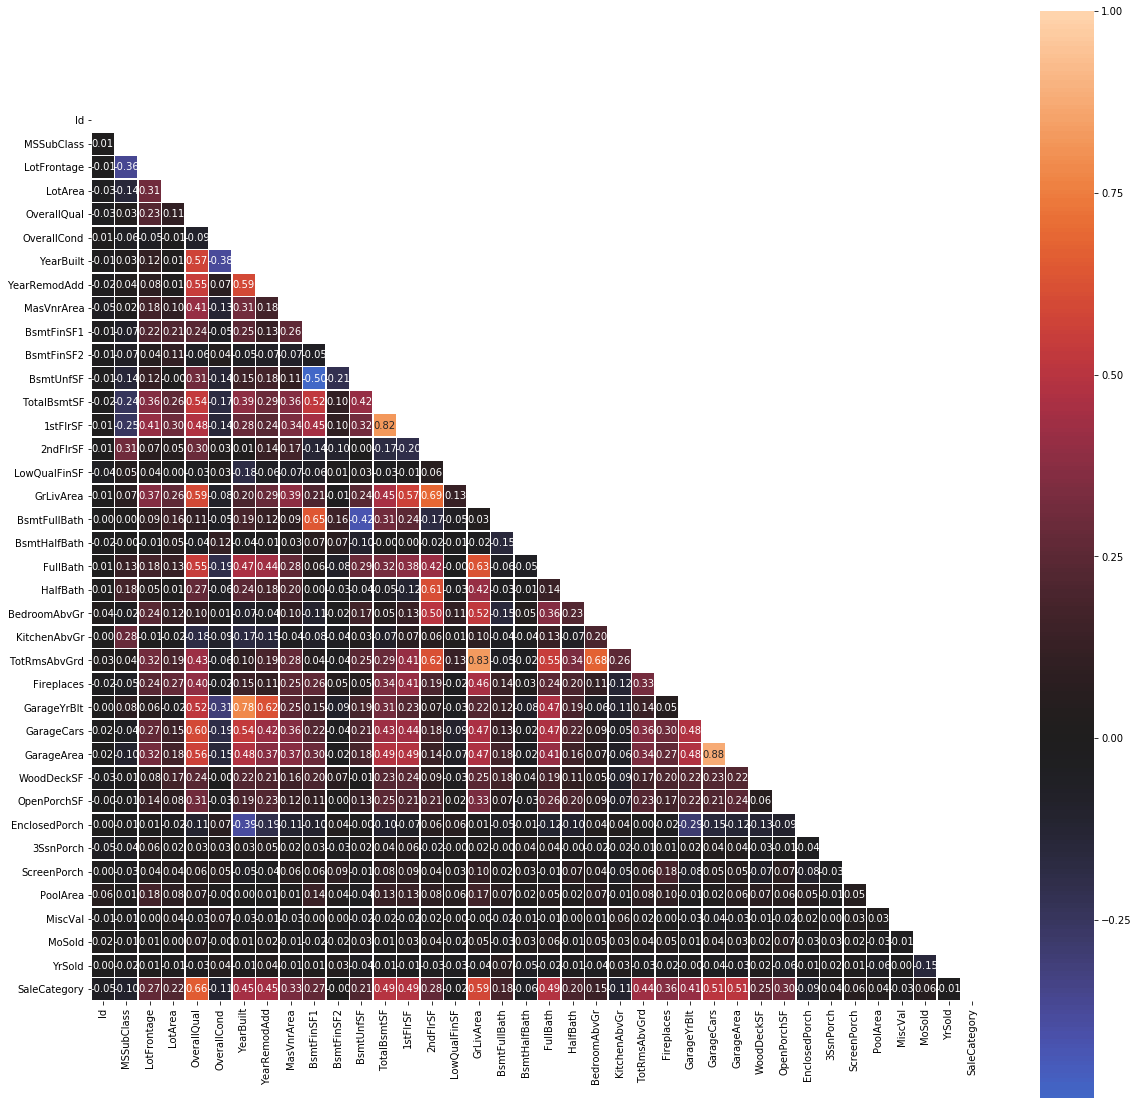

In [180]:
%config InlineBackend.figure_format = 'png'
plt.figure(figsize=(20,20))
# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True



sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5);

## 5

* Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).

In [181]:
# посмотрим на распределения с помощью countplot

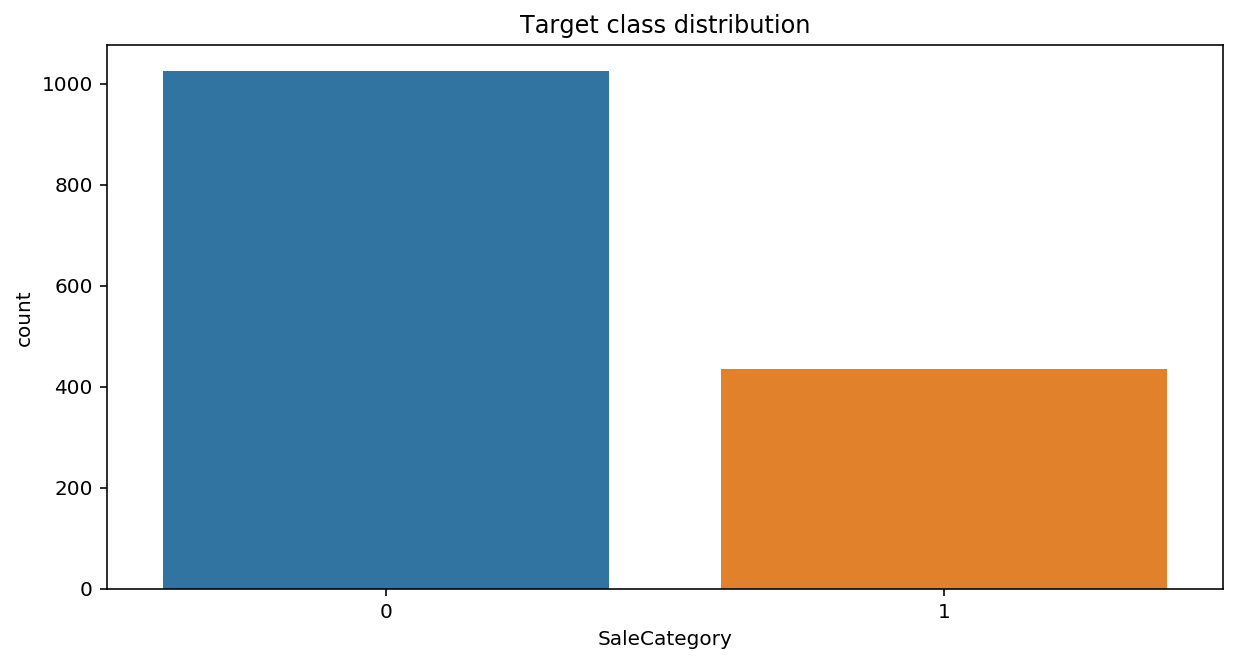

In [182]:
# посмотрим на распределение SaleCategory
%config InlineBackend.figure_format = 'retina'
ax = plt.axes()
sns.countplot(x='SaleCategory', data=data, ax=ax);
ax.set_title('Target class distribution')
plt.show()

In [183]:
# расмотрим распредления признаков в зависмости от target 0 или 1

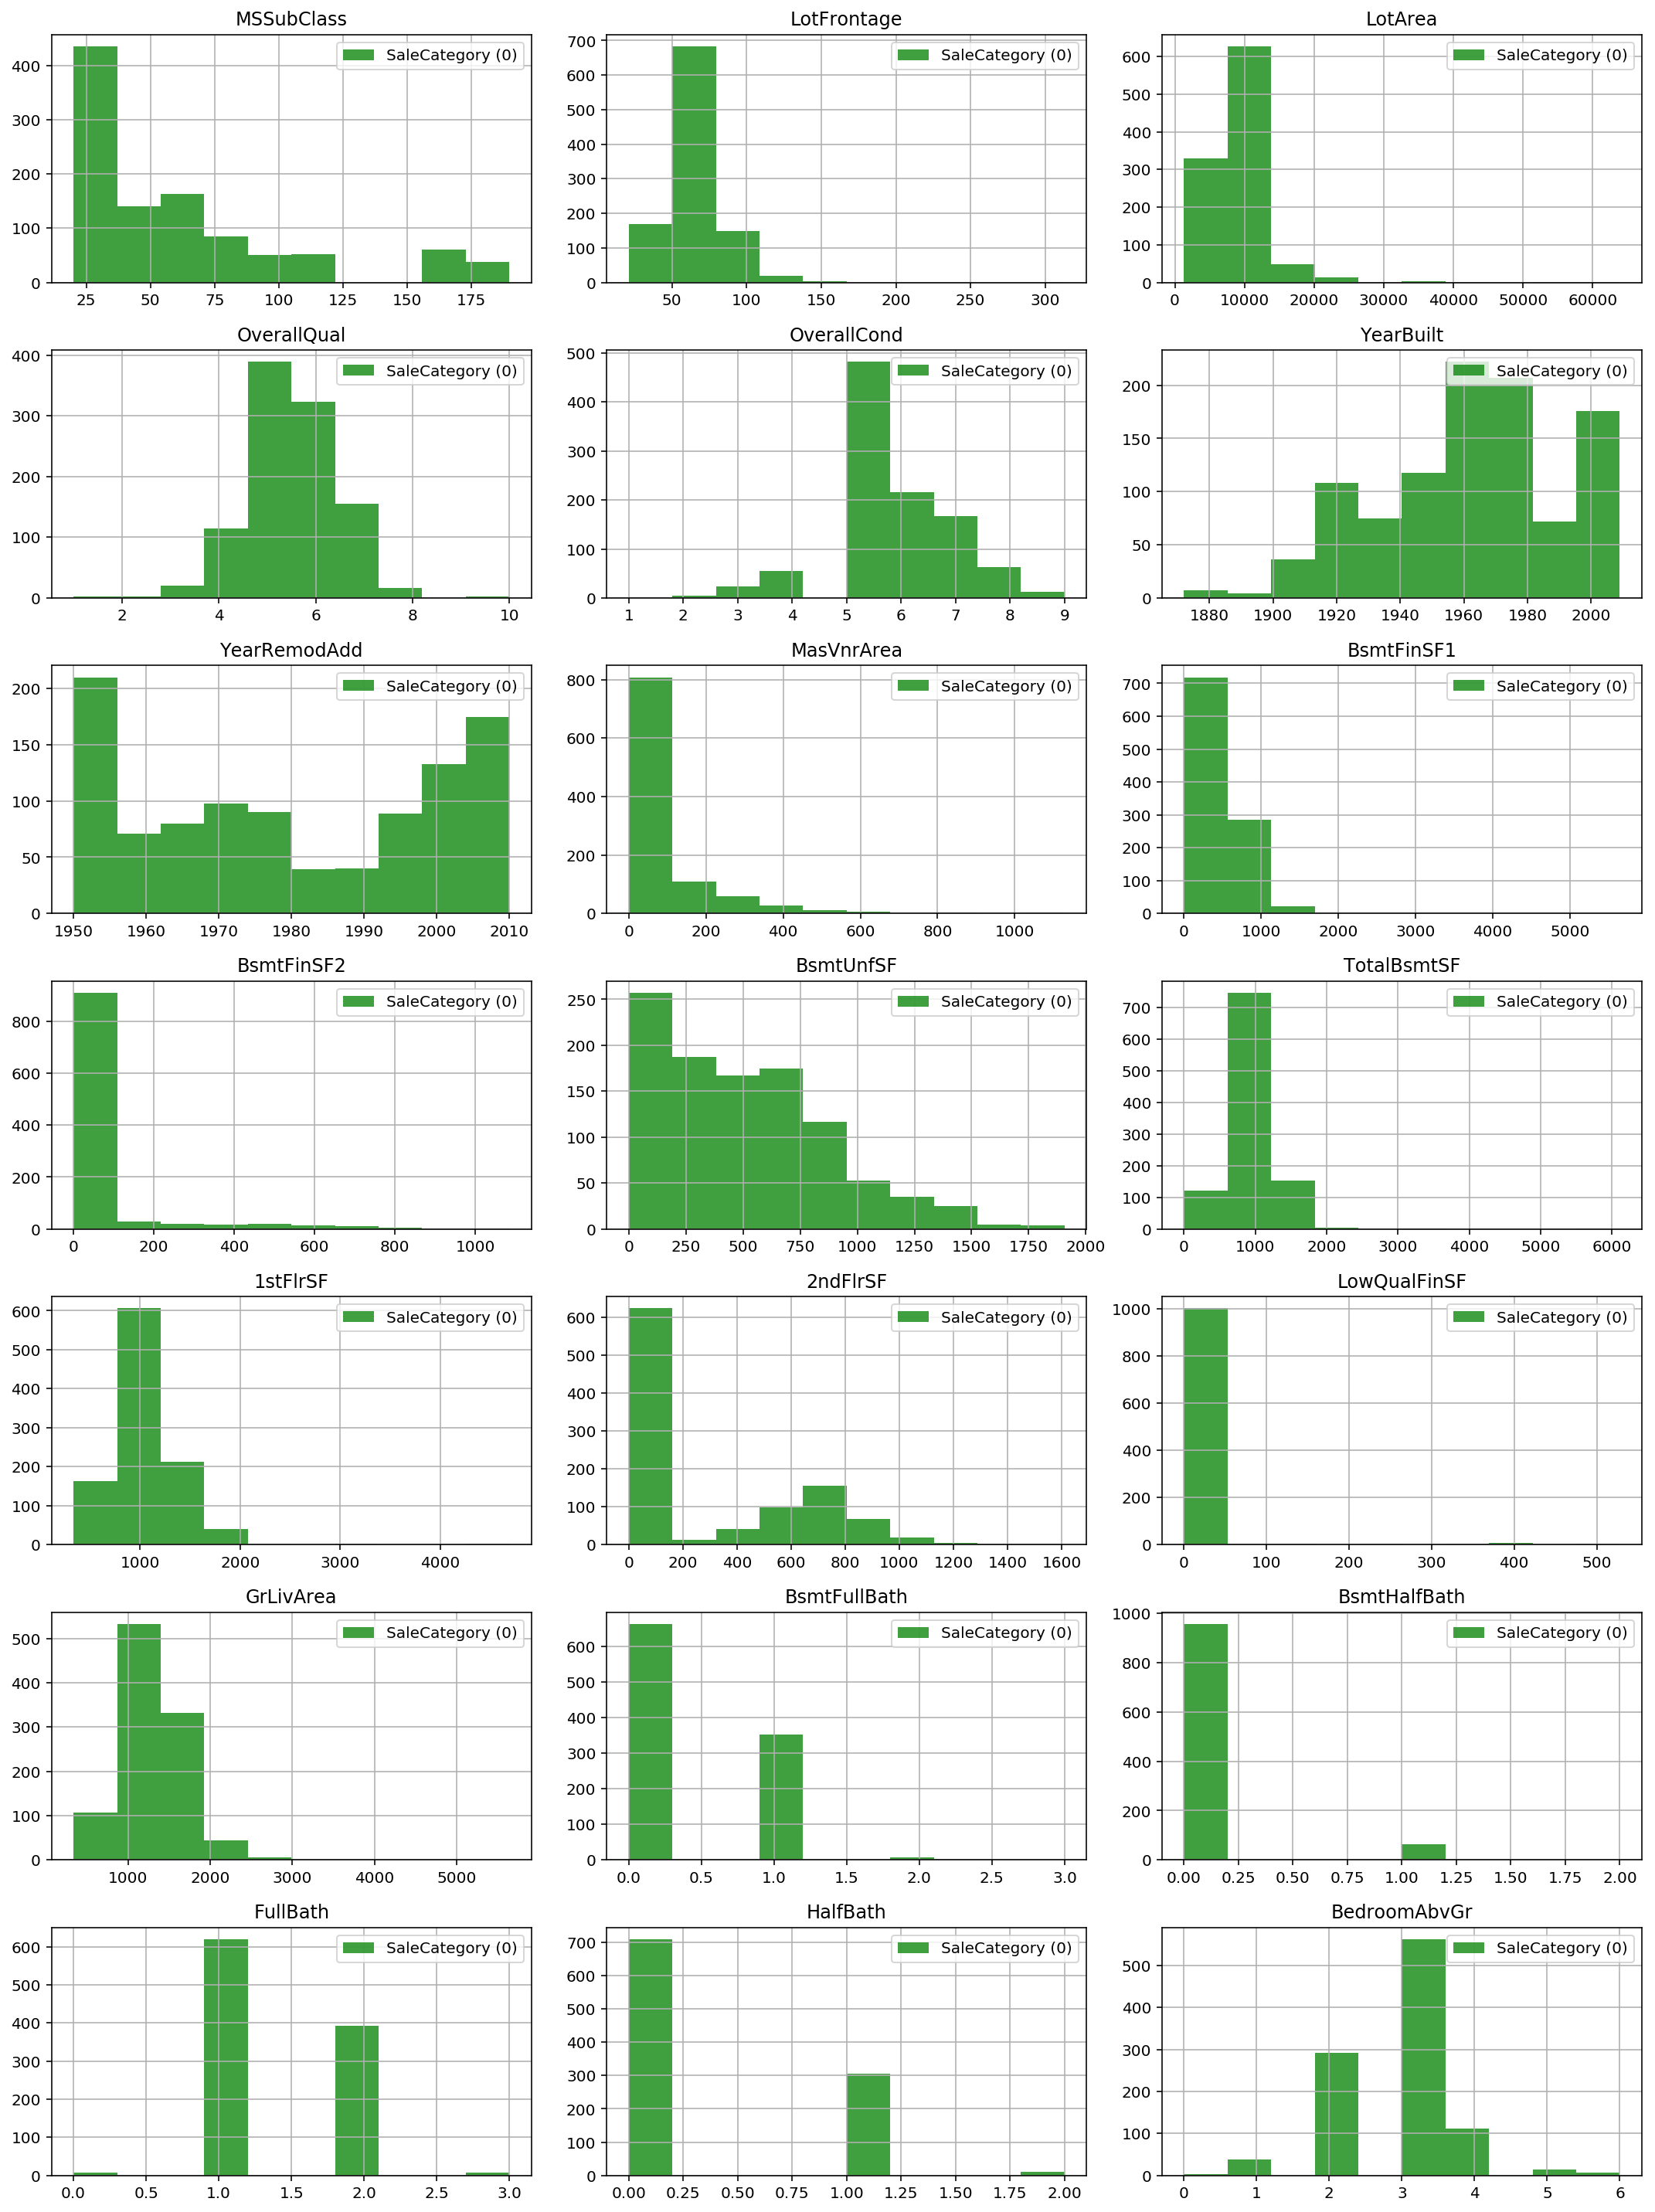

In [184]:
# SaleCategory = 0
fig, ax  =  plt.subplots(7,3, figsize=(15,20))
for col,axis in zip(data.select_dtypes(include=[np.number]).columns[1:],[i for i in ax.flat]):
    data.loc[data['SaleCategory']==0,data.columns!='SaleCategory'].hist \
    (column=col,ax=axis,alpha=0.75,color='green',label='SaleCategory (0)')
    axis.legend(loc="upper right")
plt.tight_layout()
plt.show()

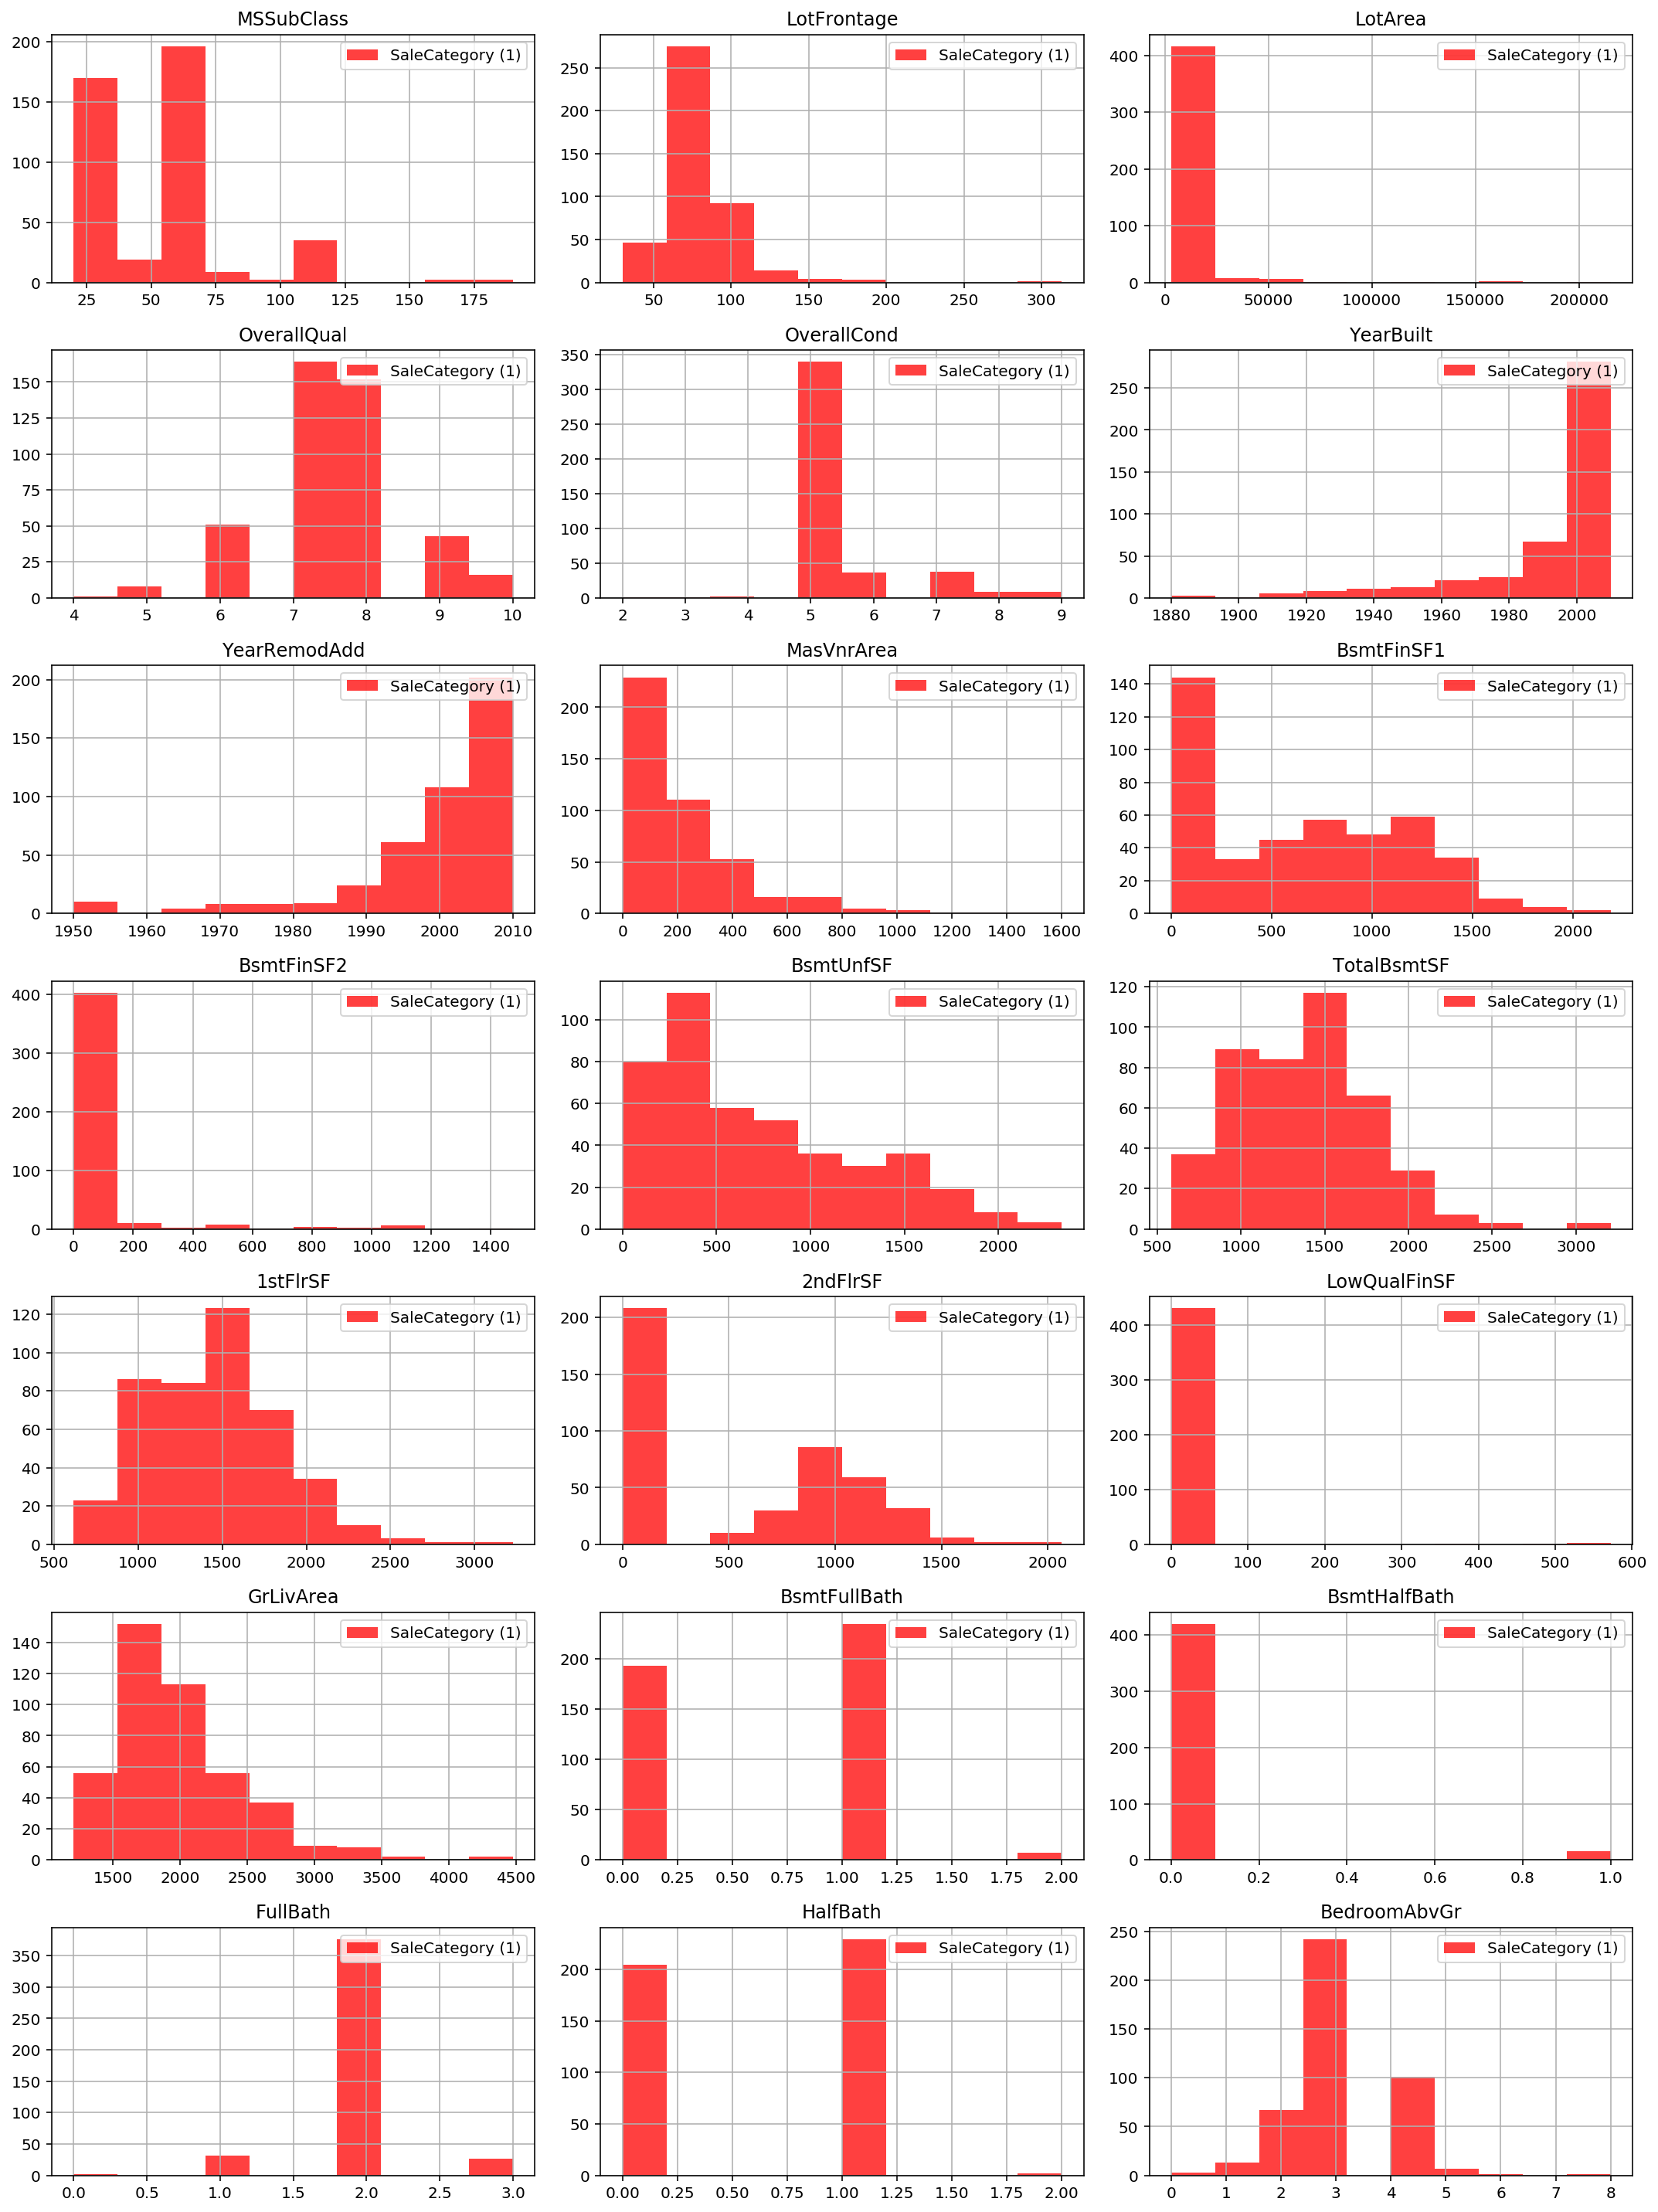

In [185]:
# SaleCategory = 1
fig, ax  =  plt.subplots(7,3, figsize=(15,20))
for col,axis in zip(data.select_dtypes(include=[np.number]).columns[1:],[i for i in ax.flat]):
    data.loc[data['SaleCategory']==1,data.columns!='SaleCategory'].hist \
    (column=col,ax=axis,alpha=0.75,color='red',label='SaleCategory (1)') 
    axis.legend(loc="upper right")
plt.tight_layout()
plt.show()

признаки распределены либо нормально , либо экспоненциально, либо бернулли

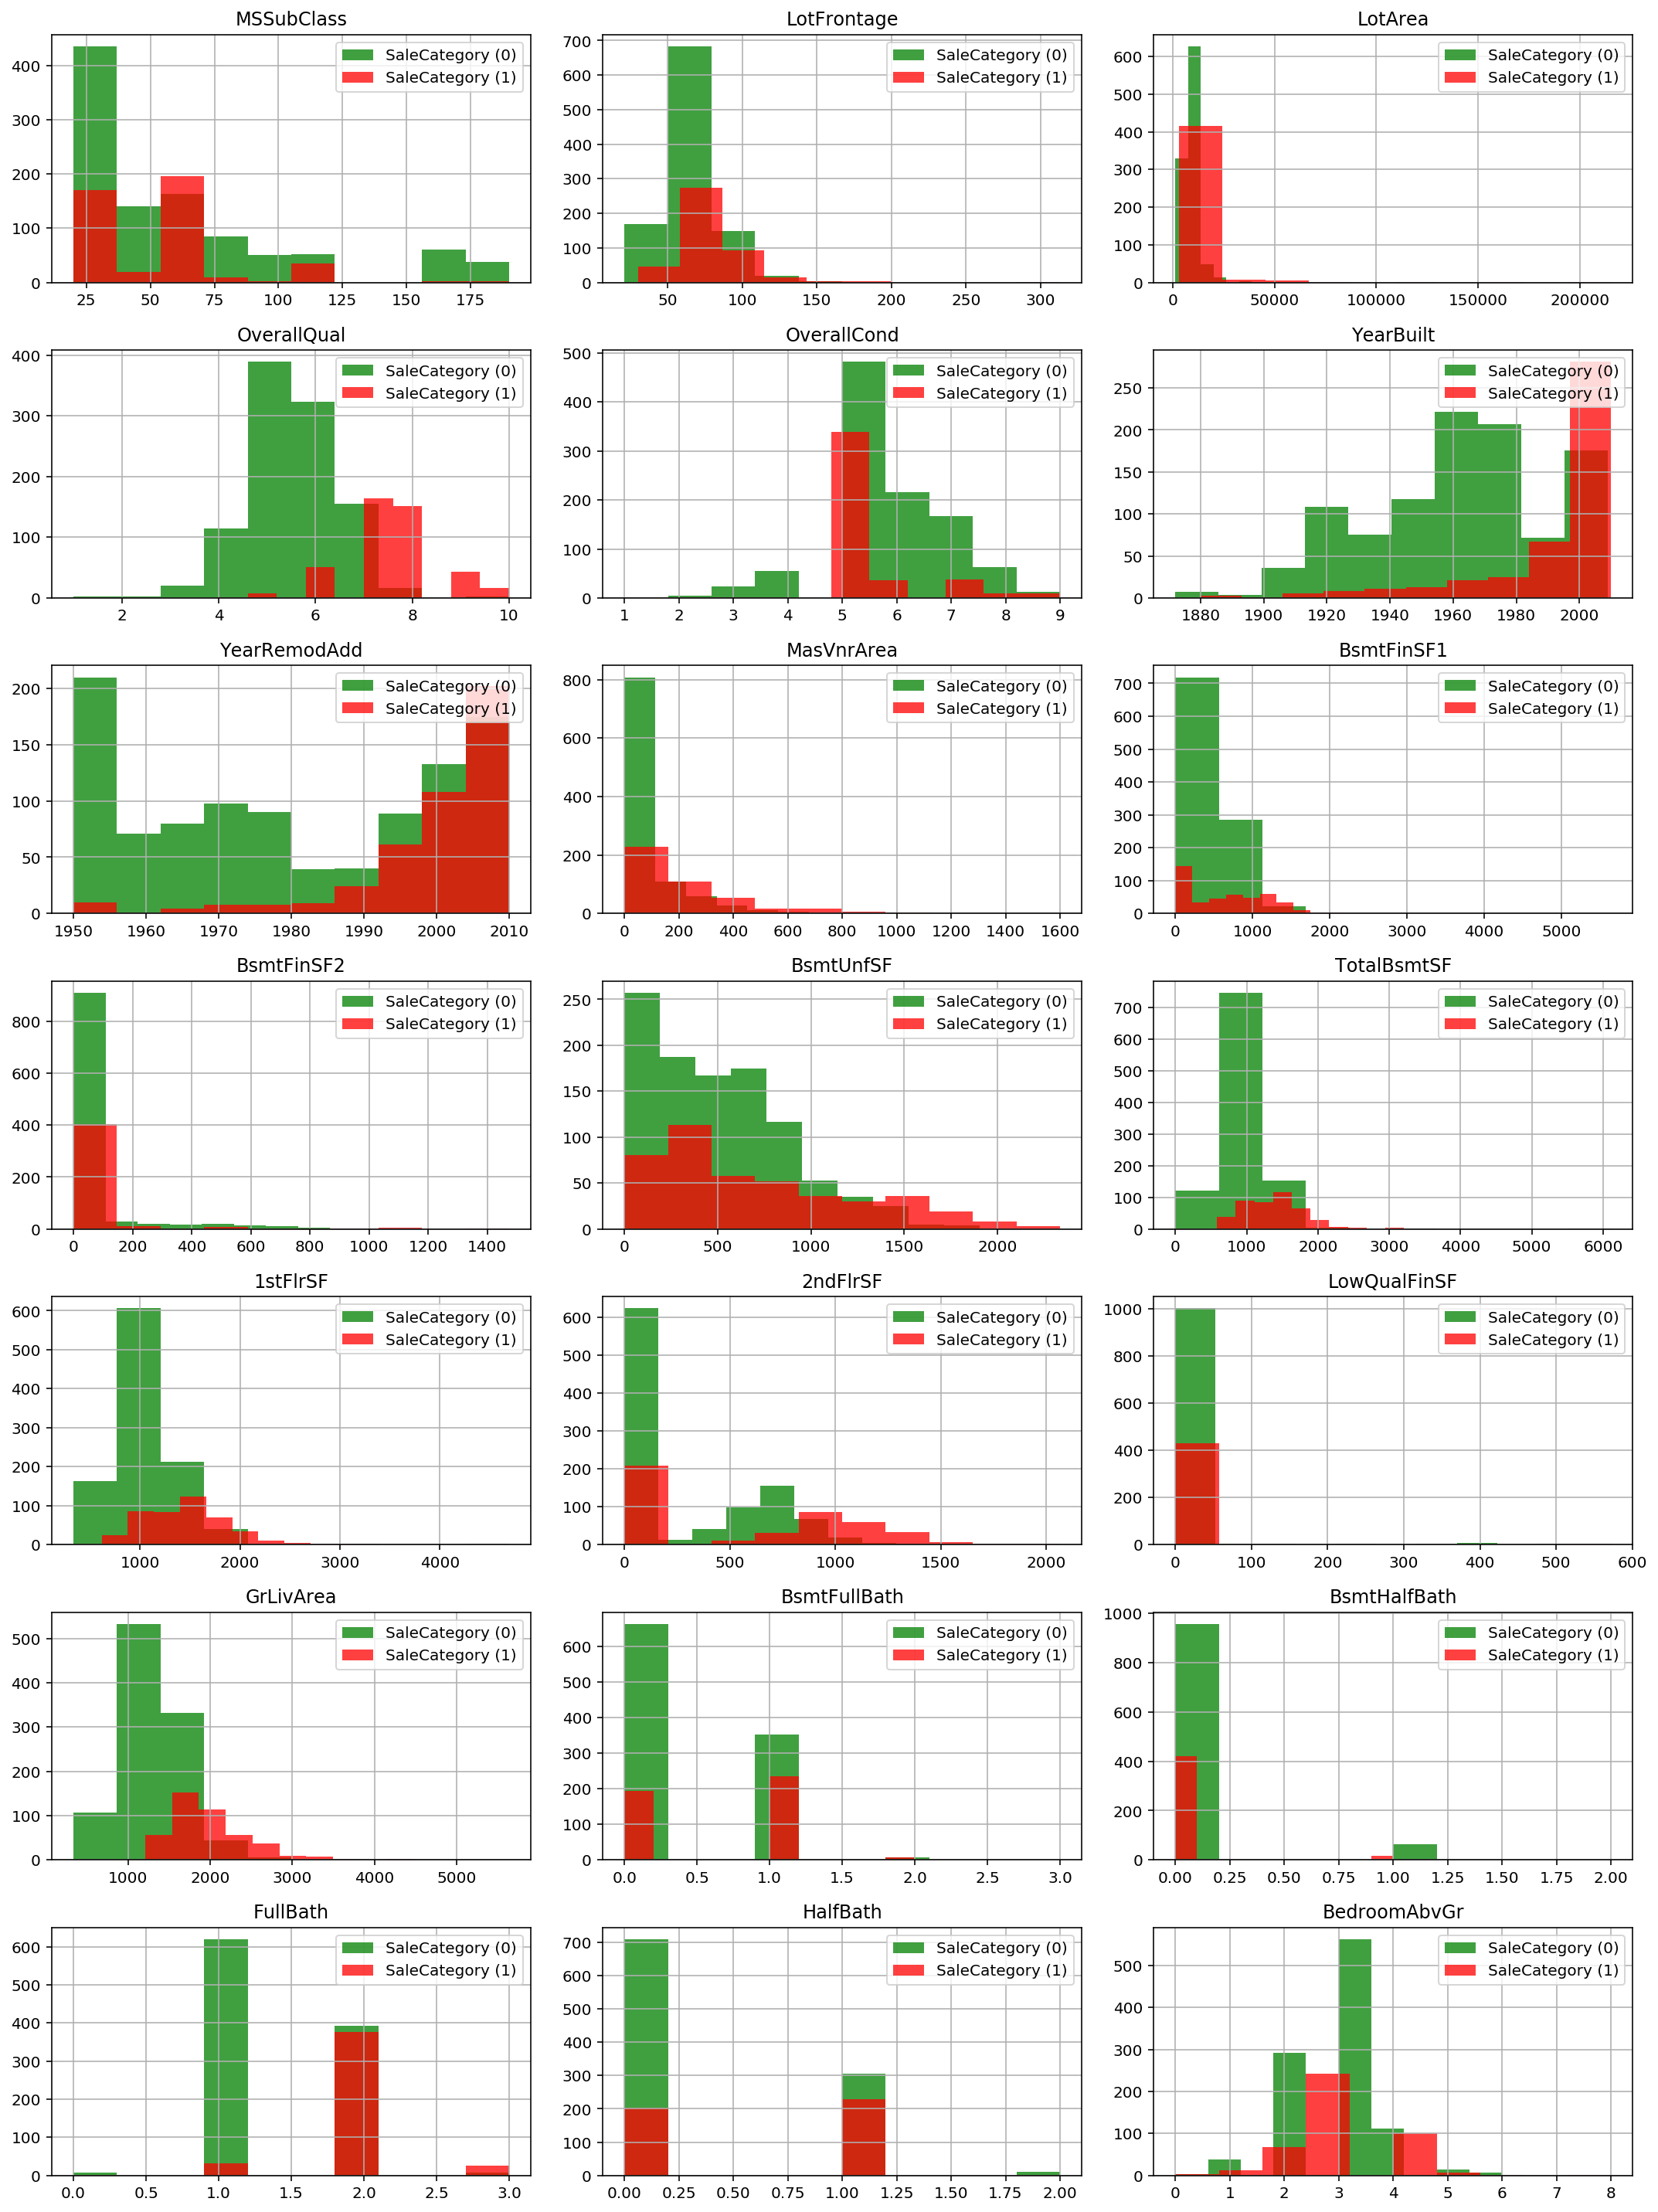

In [186]:
# Совместно
fig, ax  =  plt.subplots(7,3, figsize=(15,20))
for col,axis in zip(data.select_dtypes(include=[np.number]).columns[1:],[i for i in ax.flat]):
    data.loc[data['SaleCategory']==0,data.columns!='SaleCategory'].hist \
    (column=col,ax=axis,alpha=0.75,color='green',label='SaleCategory (0)')
    data.loc[data['SaleCategory']==1,data.columns!='diagnosis'].hist \
    (column=col,ax=axis,alpha=0.75,color='red',label='SaleCategory (1)') 
    axis.legend(loc="upper right")
plt.tight_layout()
plt.show()


## 7, 8

* Решить задачу бинарной классификации и предсказать переменную ‘SalesCategory’ протестировав нескольких алгоритмов (Logistic Regression, Random Forest) 
* Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall 


In [187]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [188]:
data = pd.get_dummies(data)


In [203]:
data.drop(columns=['Id'], inplace=True)

In [204]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [205]:
y = data['SaleCategory'].copy()
X = data.drop('SaleCategory',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [206]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Vpotapov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vpotapov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Vpotapov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vpotapov\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by Stan

In [207]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_logreg_train = logreg.predict_proba(X_train)[:, 1]
y_pred_logreg_test = logreg.predict_proba(X_test)[:, 1]


roc_auc_train = np.round(roc_auc_score(y_train, y_pred_logreg_train),2)
roc_auc_test = np.round(roc_auc_score(y_test, y_pred_logreg_test),2)

print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

C:\Users\Vpotapov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train:  0.99
Test:  0.98


In [208]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [209]:
accuracy_log = accuracy_score(y_test,y_pred_logreg_test.round())
f1_score_log = f1_score(y_test,y_pred_logreg_test.round())
precision_score_log = precision_score(y_test,y_pred_logreg_test.round())
recall_score_log = recall_score(y_test,y_pred_logreg_test.round())
print(f'Accuracy: {accuracy_log:.2f}')
print(f'F1_Score: {f1_score_log:.2f}')
print(f'Precision_Score: {precision_score_log:.2f}')
print(f'Recall_Score: {recall_score_log:.2f}')

Accuracy: 0.94
F1_Score: 0.89
Precision_Score: 0.89
Recall_Score: 0.90


In [210]:
# RF

In [211]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred_clf_test = clf.predict_proba(X_test)[:, 1]
y_pred_clf_train = clf.predict_proba(X_train)[:, 1]
roc_auc_test = np.round(roc_auc_score(y_test, y_pred_logreg_test),2)
roc_auc_train = np.round(roc_auc_score(y_train, y_pred_logreg_train),2)

print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  0.99
Test:  0.98


C:\Users\Vpotapov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [196]:
accuracy_log = accuracy_score(y_test,y_pred_clf_test.round())
f1_score_log = f1_score(y_test,y_pred_clf_test.round())
precision_score_log = precision_score(y_test,y_pred_clf_test.round())
recall_score_log = recall_score(y_test,y_pred_clf_test.round())
print(f'Accuracy: {accuracy_log:.2f}')
print(f'F1_Score: {f1_score_log:.2f}')
print(f'Precision_Score: {precision_score_log:.2f}')
print(f'Recall_Score: {recall_score_log:.2f}')

Accuracy: 0.91
F1_Score: 0.83
Precision_Score: 0.93
Recall_Score: 0.75
